<IPython.core.display.Javascript object>


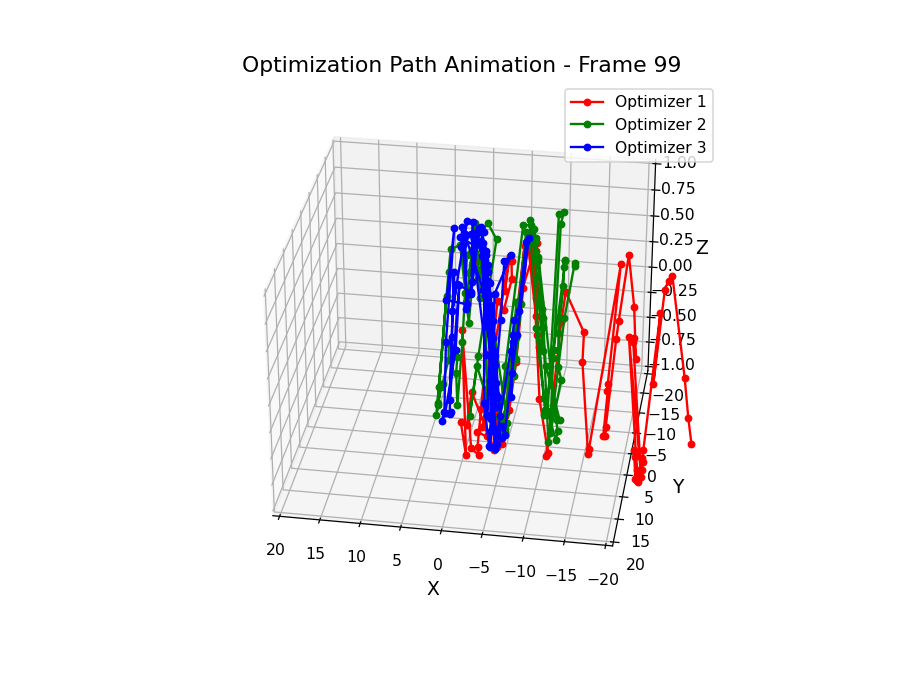

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

# Enable interactive plotting in Jupyter Notebook
%matplotlib notebook

# Example Function (Customize as per your function)
def func(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Sample Data for Optimizers (Replace with your actual optimizer data)
class Optimizer:
    def __init__(self):
        self.x_history = np.cumsum(np.random.randn(100))
        self.y_history = np.cumsum(np.random.randn(100))

# Initialize Optimizers
optimizers = [Optimizer(), Optimizer(), Optimizer()]  # Added a third optimizer for variety

# Set up the figure and 3D axis
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X', fontsize=12)
ax.set_ylabel('Y', fontsize=12)
ax.set_zlabel('Z', fontsize=12)
ax.set_title('Optimization Path Animation', fontsize=14)

# Initialize lines with distinct colors and markers
colors = ['r', 'g', 'b']
lines = [ax.plot([], [], [], color=colors[i], marker='o', label=f'Optimizer {i+1}', markersize=4)[0] for i in range(len(optimizers))]

# Set axis limits for better scaling
ax.set_xlim(-20, 20)
ax.set_ylim(-20, 20)
ax.set_zlim(-1, 1)

# Update function for the animation
def update(frame):
    ax.view_init(elev=30, azim=frame)  # Rotate the view dynamically

    for i, opt in enumerate(optimizers):
        lines[i].set_data(opt.x_history[:frame], opt.y_history[:frame])
        lines[i].set_3d_properties(func(np.array(opt.x_history[:frame]), np.array(opt.y_history[:frame])))

    ax.set_title(f'Optimization Path Animation - Frame {frame}', fontsize=14)
    return lines

# Create and display the animation
epochs = 100  # Number of frames
ani = FuncAnimation(fig, update, frames=epochs, interval=200, blit=False, repeat=False)

plt.legend()
plt.grid(True)
plt.show()
